* 이상치를 해결하시오
     1. 이상치 삭제 후 확인
     2. 이상치 중앙값으로 치환 후 확인
     3. 이상치 평균값으로 치환 후 확인
     4. 이상치 최빈값으로 치환 후 확인(최빈값이 여러개 나올 경우 0번째 값으로 진행하세요)

In [ ]:
# food.csv의 내용을 불러오세요

In [7]:
import pandas as pd
df = pd.read_csv('../data_set/2.데이터 클린징/food.csv')
df

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10
5,120,16,11
6,35,20,20
7,35,20,20
8,41,21,350
9,42,23,20


In [ ]:
# boxplot 을 이용하여 이상치 확인

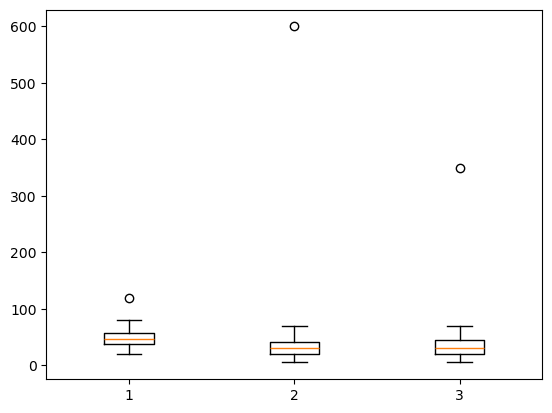

In [8]:
#df.boxplot()
import matplotlib.pyplot as plt
plt.boxplot(df)
plt.show()

In [9]:
# 각 리스트에 최저, 최고 이상치를 food_a, food_b, food_c 순서대로 넣고 아래쪽 코드에서 
lowerfence = []
upperfence = []

# 반복문을 이용하여 각 리스트에 이상치를 저장하는 code 추가

In [11]:
for column in df.columns:
    iqr = df[column].describe().loc["75%"] - df[column].describe().loc["25%"]
    lowerfence.append(df[column].describe().loc["25%"] - iqr*1.5)
    upperfence.append(df[column].describe().loc["75%"] + iqr*1.5)
    print(column,end=' ')
print('\n--------------------------------')
print("최저 이상치 : ",lowerfence)
print("최고 이상치 : ",upperfence)

food_a food_b food_c 
--------------------------------
최저 이상치 :  [9.5, -12.25, -18.25]
최고 이상치 :  [85.5, 73.75, 83.75]


In [ ]:
# 위에서 만든 이상치 list를 활용하여 각각의 이상치 값을 출력

In [21]:
count = 0
for column in df.columns:
    print(column,"이상치\n--------------\n")
    print(df[ (df[column]<lowerfence[count]) | (df[column]>upperfence[count]) ])
    print('----------------------------------------\n')
    count = count + 1

food_a 이상치
--------------

   food_a  food_b  food_c
5     120      16      11
----------------------------------------

food_b 이상치
--------------

    food_a  food_b  food_c
26      80     600      70
----------------------------------------

food_c 이상치
--------------

   food_a  food_b  food_c
8      41      21     350
----------------------------------------



In [ ]:
# 시리즈 값만 확인

In [25]:
dd = df['food_b'][ (df['food_b']<lowerfence[1]) | (df['food_b']>upperfence[1]) ]
print(dd.index[0])
dd.loc[dd.index[0]]

26


600

# 1. 이상치 삭제

In [ ]:
# 반복문을 이용하여 저장되어 있는 이상치를 지우세요.
# 삭제 후 확인하면 index 5, 8, 26 인덱스 위치가 삭제된 것 확인